# Simple Earthquake Analysis
This notebook demonstrates the workflow to download earthquake waveforms using SeisGo functions (https://github.com/xtyangpsp/SeisGo). Specifically, we will import the `seisgo.downloaders` package to download earthquake information and the waveforms. To run this notebook, you can follow the instructions on the SeisGo github page to set up the environment.

In [7]:
from obspy import UTCDateTime
from seisgo import downloaders as dld
from seisgo import utils,plotting
import matplotlib.pyplot as plt
from obspy.core import Stream

## 1. Get the waveforms for example earthquakes at this station
In the cell below, we call `downloaders.get_events()` to download the earthquake catalog. Then we call `downloaders.get_event_waveforms` to download the seismic waveform segments for those earthquakes at the example station. This function returns a list of ObsPy Stream objects and a list of event id for the waveforms.

In [2]:
#Download Catalog

start = "2021-07-27"
end = "2021-07-30"
minlat = 50
maxlat = 60
minlon=-162
maxlon=-152
minmag = 0
maxmag = 10
magstep = 1.0
# samplesize=10 #feel free to change this.
catalog = dld.get_events(start,end,minlon,maxlon,minlat,maxlat,minmag,maxmag,magstep)
print(catalog)

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-07-27&endtime=2021-07-30&minmagnitude=7.0001&maxmagnitude=8.0&minlatitude=50&maxlatitude=60&minlongitude=-162&maxlongitude=-152
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-07-27&endtime=2021-07-30&minmagnitude=9.0001&maxmagnitude=10.0&minlatitude=50&maxlatitude=60&minlongitude=-162&maxlongitude=-152
72 Event(s) in Catalog:
2021-07-28T06:35:34.411000Z | +57.848, -154.746 | 1.0 ml | automatic
2021-07-27T18:26:32.050000Z | +59.998, -153.077 | 0.97 ml | manual
...
2021-07-29T06:19:25.729000Z | +55.062, -158.134 | 6.1 mb | manual
2021-07-29T06:15:47.536000Z | +55.325, -157.841 | 8.2 mww | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


/usr/local/anaconda3/envs/seisgo/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/envs/seisgo/lib/python3.7/site-packages/obspy/imaging/maps.py:305: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  ticks=locator, format=formatter, **cb_kwargs)


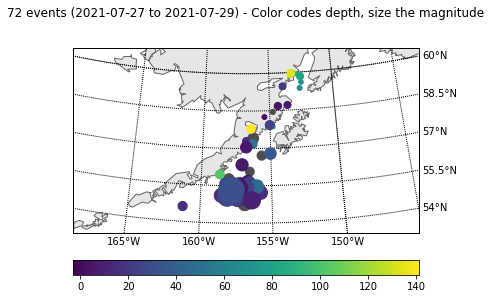

In [3]:
catalog.plot(projection='local',label=None);

## 2. Get the information of the example seismic station
We use `seisgo.downloaders` function `get_sta_list()` to download the station list (a Pandas dateframe).

The following example returns the earthquake waveforms in a list of ObsPy Trace objects. Set argument `savetofile=True` will save the data into HDF5 files.

`get_event_waveforms()` downloads one event at a time for all stations. We use a for loop here to download all earthquakes in the `catalog`.

downloading 2021-07-29T06:19:25.729000Z | +55.062, -158.134 | 6.1 mb | manual
downloading 2021-07-29T06:15:47.536000Z | +55.325, -157.841 | 8.2 mww | manual


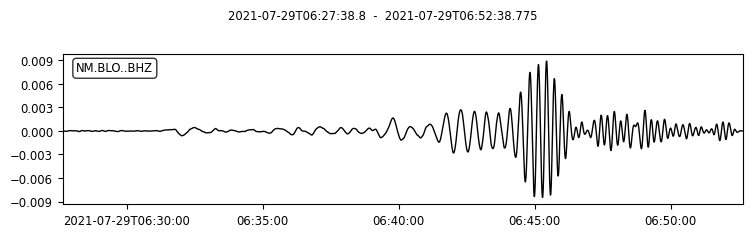

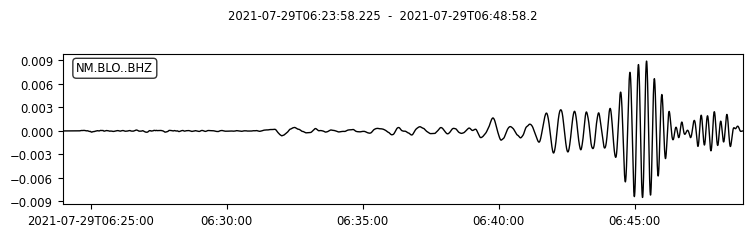

In [4]:
# =========================================================================
source = 'IRIS'
#Station list parameters
net='NM'
sta='BLO'
chan='BHZ'

#get station information first
stainfo=dld.get_sta_list(net,sta,chan,starttime=None,endtime=None)

# Downloading parameters
window_len = 1500
offset = -30 #time before the first arrival
samp_freq=40
trall=[]
minmag_plot=6
for event in catalog:
    if event.magnitudes[0]['mag'] >= minmag_plot:
        print('downloading '+str(event.short_str()))
        tr=dld.get_event_waveforms(event,stainfo,window_len,offset,samp_freq=samp_freq,savetofile=False)
        if len(tr)>0:
            trall.append(tr[0])
# it is okay if there is no data for some earthquakes. 

######write your codes here
for tr in trall:
    tr.plot();


### `seisgo.utils` also has a simple plotting function `plot_trace`. The current version of this plots the x-axis as the relative time starting from zero. It doesn't yet consider the absolute date and time.

The default mode is "subplot". mode='overlap' will plot all traces on the same figure, which is useful for the purpose of comparison.

station NM.BLO
station NM.BLO


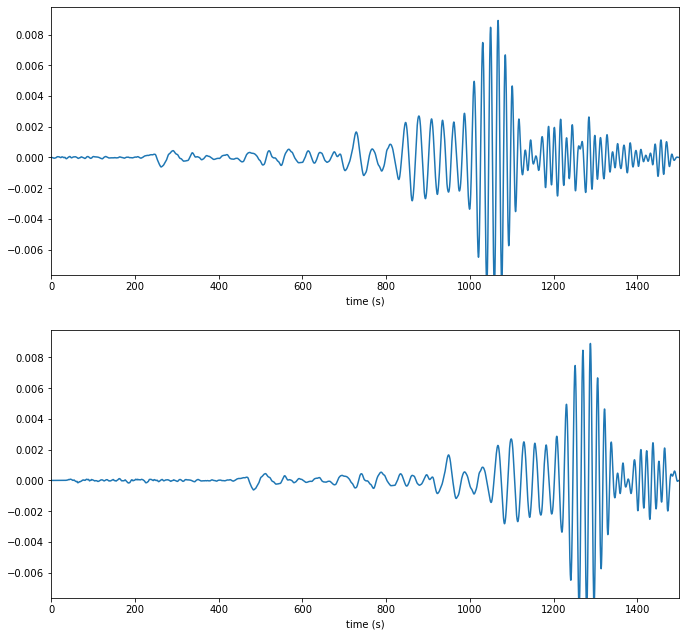

In [5]:
utils.plot_trace(trall[:4],mode='subplot') #

## 3. Get the mainshock records at multiple stations

In [ ]:
source = 'IRIS'
#Station list parameters
net='AK'
sta='C*'
chan='BHZ'

#get station information first
stainfo=dld.get_sta_list(net,sta,chan,starttime=None,endtime=None)

# Downloading parameters
window_len = 500
offset = -30 #time before the first arrival
samp_freq=40
trall=[]
event=catalog[-1]

print('downloading '+str(event.short_str()))
trall=dld.get_event_waveforms(event,stainfo,window_len,offset,samp_freq=samp_freq,savetofile=False)
trall.plot();
# it is okay if there is no data for some stations. 